# 타이타닉 생존자 예측 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
raw_data = pd.read_excel('titanic.xls')
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [3]:
#전체 정보
raw_data.dtypes #dtypes : 컬럼(항목)별 타입들을 한꺼번에 보여줌


pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [4]:
raw_data.columns #컬럼(항목)을 보여줌

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [5]:
len(raw_data.columns) #컬럼 개수 확인

14

In [6]:
raw_data.info() # 컬럼 타입 + 컬럼 개수 + 데이터 개수를 확인
#age, cabin , boat, body 등등 비어 있는 데이터를 확인 할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [7]:
raw_data.describe() #describe() 함수를 통해 
#sibsp : 가족 인원 수
#parch : 


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
raw_data.head() #5개 데이터 확인

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


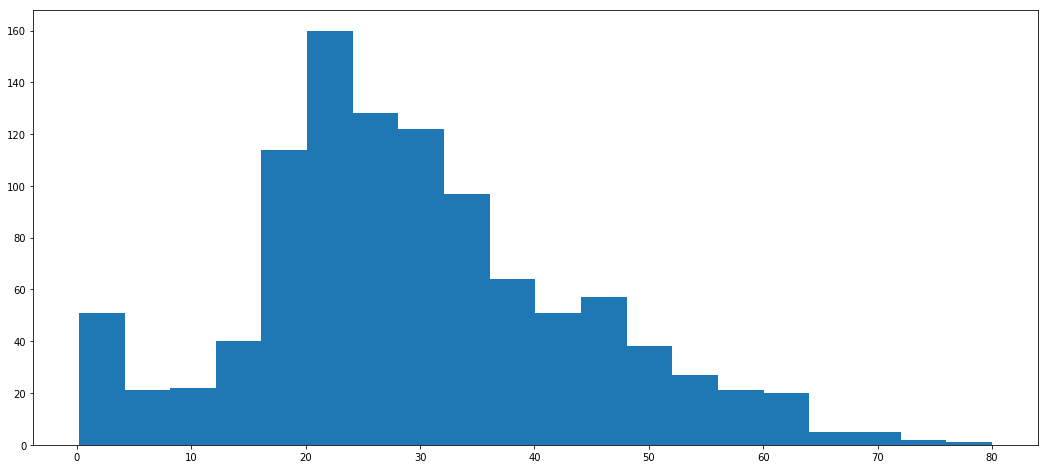

In [50]:
#.hist()
#age에 대한 히스토그램 그리기, bins : 막대 영역 grid : 격자 무늬
raw_data['age'].hist(bins=20, figsize=(18,8), grid = False) 


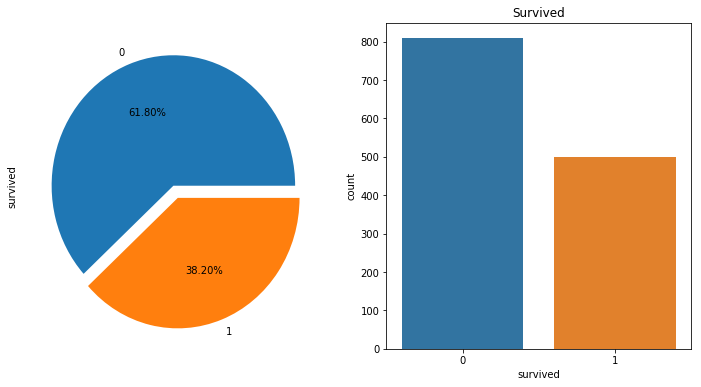

In [52]:
# subplots 만들기
# f, ax = plt.subplots(행, 열, figsize = ( , ))
f, ax = plt.subplots(1, 2, figsize = (12, 6))

#.value_counts() : 값들을 카운트 해주는 함수
raw_data['survived'].value_counts() # 0(사망) : 809명 / 1(생존) : 500명
#결과
#0    809
#1    500
#Name: survived, dtype: int64

raw_data['survived'].value_counts().plot.pie(explode = [0,0.1], ax = ax[0], autopct = '%1.2f%%')

#seaborn의 
sns.countplot('survived', data=raw_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [54]:
#그룹별 평균(등급별로 나누고 싶은경우)
raw_data.groupby('pclass').mean() #pclass를 로우인덱스로 묶음
#인사이트 : 등급이 높을수록 많이 삼
#           나이는 등급이 높을수록 많음
#           등급이 낮을수록 동행한 가족/친족이 많다


,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [12]:
raw_data.groupby('pclass').count() #등급별 인원 세보기
# 인사이트 : 3등급의 인원이 제일 많다
#            1등급이 보트를 제일 많이 탐

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
pclass,,,,,,,,,,,,,
1,323,323,323,284,323,323,323,323,256,321,201,35,289
2,277,277,277,261,277,277,277,277,23,277,112,31,261
3,709,709,709,501,709,709,709,708,16,709,173,55,195


In [13]:
#컬럼 : 데이터의 속성 항목(elements = 요소)을 갖음 =>  데이터 분석에서는 feature라고 부른다
#피쳐가 많은 경우, 1차) 분석할 떄 부족하거나 불필요한 거 제거 
#                  2차) 항목들이 크게 분석할 것 과 상관없는 경우 제거
#                       -수학적: 공분산을 통해 얼마나 흩어졌는지를 통해
#                       -공분산는 데이터양&수치가 커지면 커짐 
#                       -공분산 문제에 대한 해결책 : 범위를 -1 ~ 1사이로 지정(상관도 분석)~> 상관관계를 확인(*현재 가장 많이 사용함)
#피쳐들 선택, 전처리 등 : 피쳐엔지니어링(속성공학)

In [14]:
raw_data.corr() #데이터에 있는 컬럼(항목)간 상관관계를 구해줌 (-1 ~ 1) 
#상관관계를 구했는데
#0: 컬럼간 전혀 상관이 없다
#1: 완벽히 상관이 있다(양의 상관관계)
#-1: 완벽히 상관이 있다(음의 상관관계)
# (-, +)0.3 : 약간 상관이 있다.
# (-, +)0.5 : 상관이 있는 것 같다. 
# (- ,+)0.7 : 꽤 큰 상관이 있다.

#pclass - survived : -0.31... => 상관있음(음의 상관) ~> pclass가 증가할 수록(즉, 룸등급이 높아지면 => 3등급) survived는 감소(생존감소) 
#로우인덱스가 커질수록 ~~~~

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


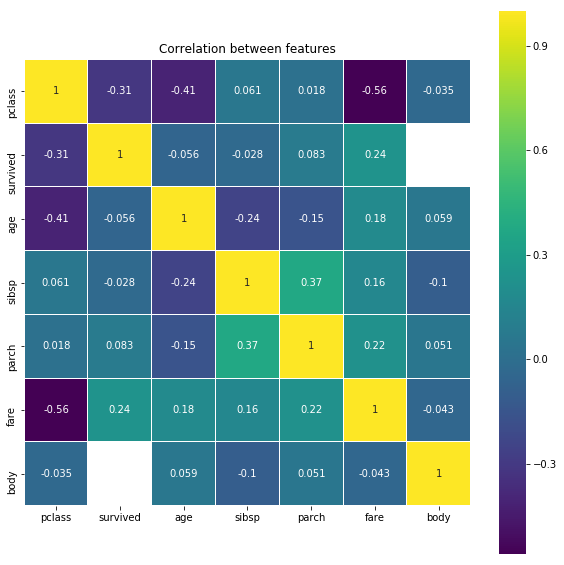

In [15]:
#구한 상관관계를 통해 시각화 
#상관도를 알 수 있는 그래프 : headtmap
plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

#1) pclass - age : class등급이 높아질 수록(3등급에 가까울수록) age(나이)가 적어지는 경향이 있다(강한 음의 상관관계)
#2) pclass - fare : class등급이 높아질 수록 fare가 작아지는 경향이 있다.(강한 음의 상관관계)
#3) sibsp - parch : 형재자매와 탄 사람의 수가 높아질 수록 부모님과 같이 탄 사람이 많은 경향이 있다.(약한 양의 상관관계)
#4) age - fare : 나이가 많을 수록 fare도 높은 경향이 있다.(약한 양의 상관관계)
#5) parch - age : 부모/자녀와 탄 사람은 나이가 적은 경향이 있다.(약한 음의 상관관계)
#6) fare - parch : 비용이 높을 수록 부모/자식과 탑승한 수가 많은 경향이 있다.(약한 양의 상관관계)

#상관관계는 인과관계를 나타내는 것은 아니다
#상관

In [16]:
#나이별 구간 및 성별 생존률 확인
#나이별 구간 묶기 : 0~5살 6살~ 12살 과 같이
#age_cat이라는 피쳐를 생성하여 값 넣기(그룹)
raw_data['age_cat'] = pd.cut(raw_data['age'], 
                             bins = [0, 3, 7, 15, 30, 60, 100], 
                             include_lowest=True, 
                             labels=['baby','children','teenage', 'young','adult','old']) #bins : 구간
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


In [17]:
#위에서 구한 age_cat을 그룹으로 묶어서 평균내기
raw_data.groupby('age_cat').mean()

,pclass,survived,age,sibsp,parch,fare,body
age_cat,,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346,4.000000
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828,NaN
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904,132.000000
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140,169.720930
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986,154.777778
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309,185.600000


In [18]:
raw_data.groupby('age_cat').count()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
age_cat,,,,,,,,,,,,,,
baby,41,41,41,41,41,41,41,41,41,7,41,26,1,25
children,25,25,25,25,25,25,25,25,25,5,25,16,0,14
teenage,49,49,49,49,49,49,49,49,49,5,49,21,3,29
young,494,494,494,494,494,494,494,494,494,82,494,178,43,289
adult,404,404,404,404,404,404,404,404,404,155,403,168,63,302
old,33,33,33,33,33,33,33,33,32,18,32,8,10,26


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


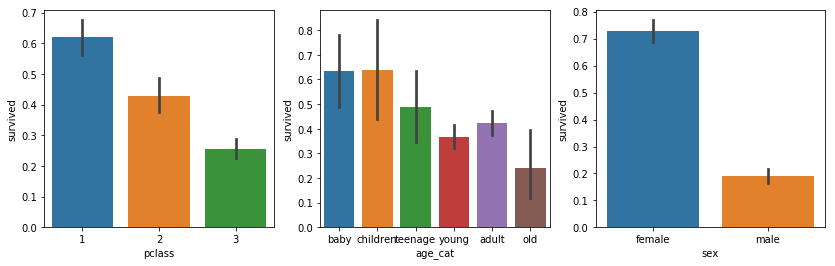

In [19]:
#2개의 컬럼을 x,y축으로 표현하는 그림그리기
#다차원(2차원이상)
plt.figure(figsize = (14,4))
plt.subplot(131) #1행에 3개를 넣을 예정인데, 아래에 있는 1번째 그래프임 을 뜻함
sns.barplot('pclass', 'survived', data = raw_data) # x축 pclass , y축 survived
#age_cat, sex별로 그리기
plt.subplot(132)
sns.barplot('age_cat', 'survived', data = raw_data)

plt.subplot(133)
sns.barplot('sex', 'survived', data = raw_data)

plt.show()

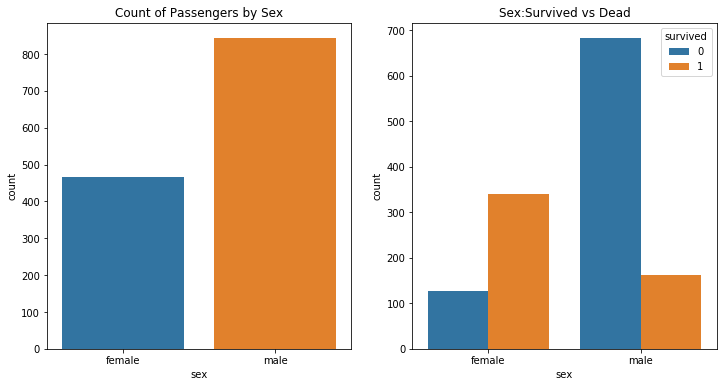

In [20]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot('sex',data=raw_data, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot('sex',hue='survived',data=raw_data, ax=ax[1]) #카운트플롯
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [21]:
#보트 탄 사람의 생존률
#boat_survivors = raw_data['boat']
boat_survivors = raw_data[raw_data['boat'].notnull()]
boat_survivors.head()
boat_survivors
#NAN이 너무 많아 => raw_data[raw_data['boat'].notnull()] -> 조건을 통해 boat컬럼 중 null이 아닌 것만(조건이 true인것 만) 가져오기

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0000,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY",young
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0000,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France",young
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0000,0,0,19877,78.8500,NaN,S,6,NaN,NaN,young
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0000,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",old
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0000,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ",adult


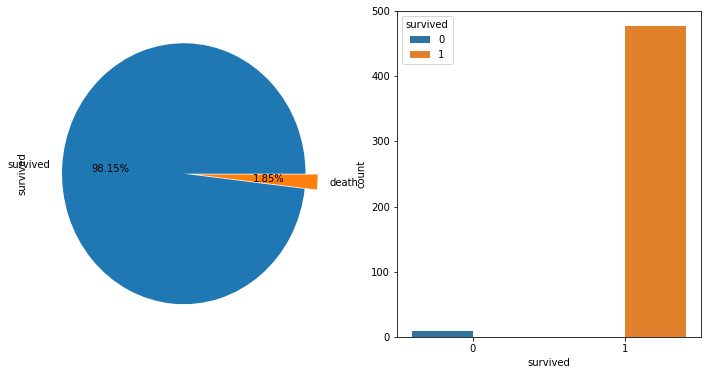

In [22]:
#보트 탄 사람들 중 생존자/비생존자를 파이차트와 카운트플롯으로 그려보세요

f, ax = plt.subplots(1, 2, figsize = (12, 6))

#보트생존자 데이터 에서 생존에 해당하는 컬럼에서 값들을 카운트해서 파이차트 생성
#matplot이용시 라벨 변경할 경우
cat = ['survived', 'death']
boat_survivors['survived'].value_counts().plot.pie(explode = [0,0.1], ax = ax[0], autopct = '%1.2f%%', labels = cat)

sns.countplot('survived',hue='survived',data=boat_survivors, ax=ax[1]) #카운트플롯

plt.show()

In [23]:
#전처리 과정 -> 숫자로 변경해주는 작업
raw_data.dtypes

pclass          int64
survived        int64
name           object
sex            object
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
cabin          object
embarked       object
boat           object
body          float64
home.dest      object
age_cat      category
dtype: object

In [24]:
raw_data['name']

0                           Allen, Miss. Elisabeth Walton
1                          Allison, Master. Hudson Trevor
2                            Allison, Miss. Helen Loraine
3                    Allison, Mr. Hudson Joshua Creighton
4         Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
5                                     Anderson, Mr. Harry
6                       Andrews, Miss. Kornelia Theodosia
7                                  Andrews, Mr. Thomas Jr
8           Appleton, Mrs. Edward Dale (Charlotte Lamson)
9                                 Artagaveytia, Mr. Ramon
10                                 Astor, Col. John Jacob
11      Astor, Mrs. John Jacob (Madeleine Talmadge Force)
12                          Aubart, Mme. Leontine Pauline
13                           Barber, Miss. Ellen "Nellie"
14                   Barkworth, Mr. Algernon Henry Wilson
15                                    Baumann, Mr. John D
16                               Baxter, Mr. Quigg Edmond
17        Baxt

In [25]:
#이름 분리
name = raw_data['name'][0]
name.split(',')

['Allen', ' Miss. Elisabeth Walton']

In [26]:
name.split(',')[1]

' Miss. Elisabeth Walton'

In [27]:
name.split(',')[1].split('.')

[' Miss', ' Elisabeth Walton']

In [28]:
name.split(',')[1].split('.')[0].strip() #strip(): 공백제거

'Miss'

In [29]:
len(name.split(',')[1].split('.')[0].strip())

4

In [30]:
def call(x):
    print(x + 100)

call(100)

200


In [31]:
# 프로그램 언어 분류: 번역해서 실행방식을 기준
# 한줄 씩 번역해서 실행(번역기, interpreter) : 인터프리터 언어, 파이썬 , R
# 통째로 번역해서 실행(속도가 더 빠름, 컴파일러, compiler): 컴파일 언어, 자바 , C++

In [32]:
# 람다 함수(lamda) => 잠깐만 사용하고(이름중 단순하게 miss인지 mr인지만 판단하고 사용 안할거라) 말거면(메모리 효율성을 극대화 시키기 위해) 
#                     사용하는 경우
test = lambda x : x + 2   #lambda a : b  => a : 입력값 , b : 수행문
test(2)


4

In [33]:
map(test, range(5)) # map(처리함수, 브로드캐스팅할 데이터 리스트 목록~> range에 있는 값들을 test로 처리)

In [34]:
list(map(test, range(5)))

[2, 3, 4, 5, 6]

In [35]:
conversion_rare = lambda x : x.split(',')[1].split('.')[0].strip()

list1 = list(map(conversion_rare, raw_data['name'])) 
list1

['Miss',
 'Master',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Col',
 'Mrs',
 'Mme',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Dr',
 'Mrs',
 'Mrs',
 'Mrs',
 'Miss',
 'Major',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Capt',
 'Miss',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Dr',
 'Master',
 'Mrs',
 'Mr',
 'Mrs',
 'Mrs',
 'Lady',
 'Sir',
 'Mr',
 'Mrs',
 'Miss',
 'Miss',
 'Miss',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Dr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',

In [36]:
len(list1)

1309

In [37]:
type(list)

type

In [38]:
#title이란 컬럼 추가 + 값대입
raw_data['title'] = list1
raw_data['title']

0         Miss
1       Master
2         Miss
3           Mr
4          Mrs
5           Mr
6         Miss
7           Mr
8          Mrs
9           Mr
10         Col
11         Mrs
12         Mme
13        Miss
14          Mr
15          Mr
16          Mr
17         Mrs
18        Miss
19          Mr
20          Mr
21         Mrs
22          Mr
23        Miss
24        Miss
25          Mr
26          Mr
27         Mrs
28        Miss
29          Mr
         ...  
1279      Miss
1280        Mr
1281        Mr
1282        Mr
1283        Mr
1284        Mr
1285        Mr
1286       Mrs
1287        Mr
1288        Mr
1289        Mr
1290       Mrs
1291        Mr
1292        Mr
1293        Mr
1294        Mr
1295        Mr
1296        Mr
1297        Mr
1298        Mr
1299        Mr
1300       Mrs
1301        Mr
1302        Mr
1303        Mr
1304      Miss
1305      Miss
1306        Mr
1307        Mr
1308        Mr
Name: title, Length: 1309, dtype: object

In [39]:
type(raw_data['title'])

pandas.core.series.Series

In [40]:
#list가 df의 파생변수(컬럼)가 되는 순간 Series로 변환 된다.
conversion_rare = lambda x : x.split(',')[1].split('.')[0].strip()
#list(map(conversion_rare, raw_data['name'])) 
raw_data['title'] = raw_data['name'].map(conversion_rare) #위와 같음

In [41]:
titles = raw_data['title'].unique() # .unique() : 중복 빼고 출력
titles

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [42]:
pd.crosstab(raw_data['title'], raw_data['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [43]:
raw_data['title'] = raw_data['title'].replace('Mlle', 'Miss') #Mlle => Miss로 바꿔라
raw_data['title'] = raw_data['title'].replace('Ms', 'Miss') #Ms => Miss로 바꿔라
raw_data['title'] = raw_data['title'].replace('Mme', 'Mrs') #Mme => Mrs로 바꿔라

In [44]:
raw_data['title']

0         Miss
1       Master
2         Miss
3           Mr
4          Mrs
5           Mr
6         Miss
7           Mr
8          Mrs
9           Mr
10         Col
11         Mrs
12         Mrs
13        Miss
14          Mr
15          Mr
16          Mr
17         Mrs
18        Miss
19          Mr
20          Mr
21         Mrs
22          Mr
23        Miss
24        Miss
25          Mr
26          Mr
27         Mrs
28        Miss
29          Mr
         ...  
1279      Miss
1280        Mr
1281        Mr
1282        Mr
1283        Mr
1284        Mr
1285        Mr
1286       Mrs
1287        Mr
1288        Mr
1289        Mr
1290       Mrs
1291        Mr
1292        Mr
1293        Mr
1294        Mr
1295        Mr
1296        Mr
1297        Mr
1298        Mr
1299        Mr
1300       Mrs
1301        Mr
1302        Mr
1303        Mr
1304      Miss
1305      Miss
1306        Mr
1307        Mr
1308        Mr
Name: title, Length: 1309, dtype: object

In [45]:
#드물게 발생하는 값에 대해서 하나로 통합해서 처리(기타로)~ capt, col .... 이런애들

Rare = ['Col','Major', 'Capt', 'Lady', 'Sir', 'Dona', 'Jonkheer', 'the Countess', 'Don', 'Rev']
for x in Rare:
    raw_data['title'] = raw_data['title'].replace(x, 'Rare') #Rare에 들어있는 값을 하나씩 꺼내 공통된 내용으로 바꾸기

In [46]:
raw_data['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Rare', 'Dr'], dtype=object)

In [47]:
#raw_data.groupby('title').mean() : 모든 컬럼 다 보임
raw_data[['title','survived']].groupby('title').mean() #title, survived 만 보임

,survived
title,
Dr,0.500000
Master,0.508197
Miss,0.678030
Mr,0.162483
Mrs,0.787879
Rare,0.333333


In [55]:
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult,Mr
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old,Miss
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",adult,Mr
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult,Mrs
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",old,Mr


In [64]:
#object 타입을 숫자 타입으로 변경해주는 과정 male = 1 , female = 0
tmp = ['f'] * 1309 # object 타입으로 들어가있는 리스트
raw_data2 = raw_data.copy()
raw_data2['sex'] = tmp
raw_data2

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",f,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",f,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",f,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",f,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",f,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs
5,1,1,"Anderson, Mr. Harry",f,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult,Mr
6,1,1,"Andrews, Miss. Kornelia Theodosia",f,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old,Miss
7,1,0,"Andrews, Mr. Thomas Jr",f,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",adult,Mr
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",f,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult,Mrs
9,1,0,"Artagaveytia, Mr. Ramon",f,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",old,Mr


In [69]:
#raw_data의 sex컬럼부분의 값들을 문자 -> 숫자로 변경
tmp2 = []
for x in raw_data['sex']:
    if(x == 'female'):
        tmp2.append(0)
    elif(x == 'male'):
        tmp2.append(1)
    else:
        tmp2.append(np.nan) #nan값
        

In [70]:
len(tmp2)

1309

In [76]:
raw_data['sex'] = tmp2
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",1,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",1,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",0,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",1,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",0,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",1,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [77]:
# 타입변환 ~> to_frame(), astype('float')
raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",1.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",0.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [81]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1046 non-null float64
survived     1046 non-null float64
name         1046 non-null object
sex          1046 non-null float64
age          1046 non-null float64
sibsp        1046 non-null float64
parch        1046 non-null float64
ticket       1046 non-null object
fare         1045 non-null float64
cabin        272 non-null object
embarked     1044 non-null object
boat         417 non-null object
body         120 non-null float64
home.dest    685 non-null object
dtypes: float64(8), object(6)
memory usage: 122.6+ KB


In [83]:
#null인 부분을 뺴는 작업
raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1045 non-null float64
survived     1045 non-null float64
name         1045 non-null object
sex          1045 non-null float64
age          1045 non-null float64
sibsp        1045 non-null float64
parch        1045 non-null float64
ticket       1045 non-null object
fare         1045 non-null float64
cabin        272 non-null object
embarked     1043 non-null object
boat         417 non-null object
body         119 non-null float64
home.dest    685 non-null object
dtypes: float64(8), object(6)
memory usage: 122.5+ KB


In [86]:
#하나의 컬럼만 찾아보고 싶을땐 '요소' / 다양한 컬럼 궁금 ~> [' ', ' ', ' '.....]
train_data = raw_data[['pclass','sex','age','sibsp','parch','fare']]
train_data

,pclass,sex,age,sibsp,parch,fare
0,1.0,0.0,29.0000,0.0,0.0,211.3375
1,1.0,1.0,0.9167,1.0,2.0,151.5500
2,1.0,0.0,2.0000,1.0,2.0,151.5500
3,1.0,1.0,30.0000,1.0,2.0,151.5500
4,1.0,0.0,25.0000,1.0,2.0,151.5500
5,1.0,1.0,48.0000,0.0,0.0,26.5500
6,1.0,0.0,63.0000,1.0,0.0,77.9583
7,1.0,1.0,39.0000,0.0,0.0,0.0000
8,1.0,0.0,53.0000,2.0,0.0,51.4792
9,1.0,1.0,71.0000,0.0,0.0,49.5042


In [160]:
#################데이터 준비 끝######################
#학습할 데이터 / 검증용 데이터 분리 하기
#머신러닝용 라이브러리 : sklearn(사이킷런)
from sklearn.model_selection import train_test_split #사이킷런을 이용해서 트레이닝 데이터/ 테스트 데이터를 나눠줌
#X_train(문제) , Y_train(답)
X_train, X_test, Y_train, Y_test = train_test_split(train_data, #전체 데이터
                 raw_data['survived'], #맞추어야할 정답(라벨값)
                 test_size = 0.1, #테스트데이터를 10%로 지정, 훈련데이터 90%
                 random_state = 13 #seed값 : 할 때마다 값 방지를 위해
                )

In [161]:
len(X_train) #훈련용 데이터

940

In [162]:
len(Y_train) #훈련

940

In [163]:
raw_data['survived'] #시리즈
raw_data[['survived']] #데이터프레임

,survived
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0
5,1.0
6,1.0
7,0.0
8,1.0
9,0.0


In [164]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare
710,3.0,0.0,37.0,0.0,0.0,7.7500
423,2.0,1.0,34.0,0.0,0.0,13.0000
646,3.0,0.0,38.0,1.0,5.0,31.3875
596,2.0,1.0,31.0,0.0,0.0,13.0000
286,1.0,0.0,63.0,1.0,0.0,221.7792


In [165]:
Y_train.head()

710    0.0
423    0.0
646    1.0
596    1.0
286    0.0
Name: survived, dtype: float64

In [166]:
X_train = X_train.reset_index() #인덱스가 들쑥날쑥하기 때문에 reset_index()를 사용하여 기존 인덱스는 컬럼값으로 변경
X_train

,index,pclass,sex,age,sibsp,parch,fare
0,710,3.0,0.0,37.0000,0.0,0.0,7.7500
1,423,2.0,1.0,34.0000,0.0,0.0,13.0000
2,646,3.0,0.0,38.0000,1.0,5.0,31.3875
3,596,2.0,1.0,31.0000,0.0,0.0,13.0000
4,286,1.0,0.0,63.0000,1.0,0.0,221.7792
5,1252,3.0,1.0,44.0000,0.0,0.0,8.0500
6,600,3.0,1.0,42.0000,0.0,0.0,7.5500
7,583,2.0,0.0,40.0000,0.0,0.0,15.7500
8,853,3.0,1.0,25.0000,0.0,0.0,7.2500
9,692,3.0,0.0,18.5000,0.0,0.0,7.2833


In [167]:
#위에서 생성된 index를 삭제
X_train.drop(columns='index', inplace=True)
X_train

,pclass,sex,age,sibsp,parch,fare
0,3.0,0.0,37.0000,0.0,0.0,7.7500
1,2.0,1.0,34.0000,0.0,0.0,13.0000
2,3.0,0.0,38.0000,1.0,5.0,31.3875
3,2.0,1.0,31.0000,0.0,0.0,13.0000
4,1.0,0.0,63.0000,1.0,0.0,221.7792
5,3.0,1.0,44.0000,0.0,0.0,8.0500
6,3.0,1.0,42.0000,0.0,0.0,7.5500
7,2.0,0.0,40.0000,0.0,0.0,15.7500
8,3.0,1.0,25.0000,0.0,0.0,7.2500
9,3.0,0.0,18.5000,0.0,0.0,7.2833


In [168]:
#인덱스 설정
X_test = X_test.reset_index()
Y_train = Y_train.reset_index()
Y_test = Y_test.reset_index()

In [169]:
#불필요한 컬럼 삭제
X_test.drop(columns='index', inplace=True)
Y_train.drop(columns='index', inplace=True)
Y_test.drop(columns='index', inplace=True)

In [170]:
Y_train

,survived
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0
5,0.0
6,0.0
7,1.0
8,0.0
9,0.0


In [174]:
#decisiontree
#의사결정트리

from sklearn.tree import DecisionTreeClassifier
#학습기 객체 생성
#하이퍼파라미터 : 분석가가 변경가능한 파라미터
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13) #깊이를 너무 깊게 하면 너무 완벽하게 fit됨 => 이거에 어긋나는게(예상치 못한 학습내용)
                                                                #생기면 귀신같이 fit되서 그 이외의 상황을 풀지 못함 따라서 적당량만 학습시켜야함
                                                                #너무 높은 정확도는 안좋음 => 80%정도로 맞추도록

#공부시키기
#fit -> predict
tree_clf.fit(X_train, Y_train)

#train데이터를 가지고 공부한 점수(정확도)
tree_clf.score(X_train, Y_train)

0.8117021276595745

In [175]:
from sklearn.metrics import accuracy_score #채점해주는 라이브러리
y_pred = tree_clf.predict(X_test) #문제를 주고 풀어보라고 함. => 답안을 리턴해줌

#테스트데이터를 푼 답안과 해답을 비교해서 정확도를 구해보자
accuracy_score(Y_test, y_pred)

0.8476190476190476

In [176]:
#디카프리오와, 윈슬렛의 정보를 통해 살았는지 죽었는지 예측
#다 float데이터 이므로 float형식으로 
#pclass, sex, age, sibsp, parch, fare
dicaprio = [3., 1., 19., 0., 0., 5.]
winslet = [1., 0., 17., 1., 1., 100.]

In [177]:
tree_clf.predict_proba([winslet]) #죽을 가능성[0], 살 가능성[1] ~> 죽을 가능성은 2%, 살 가능성 98%

array([[0.02419355, 0.97580645]])

In [178]:
tree_clf.predict_proba([dicaprio])

array([[0.875, 0.125]])

In [183]:
me = [2.,1.,27.,1.,1.,10.]
tree_clf.predict_proba([me])

array([[0.875, 0.125]])

In [188]:
train_data.iloc[:, :] == 'null'

,pclass,sex,age,sibsp,parch,fare
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False
